In [ ]:
import tensorflow

In [ ]:
pip install tensorflow

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#All these images in Numpy Arrays
train_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [4]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

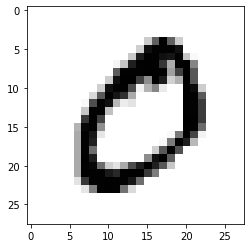

In [5]:
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.show

In [6]:
train_labels[4]

9

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
#there are 60000 images for training and 10000 images for testing.

In [9]:
len(train_images)

60000

In [10]:
len(test_images)

10000

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
28*28

784

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [14]:
#Sequential|
network = models.Sequential()

In [15]:
network.add(layers.Dense(512, activation='relu', input_shape=(784,)))
network.add(layers.Dense(10, activation='softmax'))

In [16]:
#compilation
network.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
#Very Important Step
train_images = train_images.reshape((60000, 28*28)) #ye 784 vector ka ek array ban gia
train_images = train_images.astype('float32')/255


test_images = test_images.reshape((10000, 28*28)) #ye 784 vector ka ek array ban gia
test_images = test_images.astype('float32')/255

In [18]:
#One Hot Encoding

In [19]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical (test_labels)

In [20]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
#Network Structure is ready and data is also ready
# Now its time to start the Training

In [23]:
network.fit ( train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 3ms/step - loss: 0.2609 - accuracy: 0.9249
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1044 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0696 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0503 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0372 - accuracy: 0.9887


In [24]:
#Now Testing the performance of model on Test Data

test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0654 - accuracy: 0.9800


In [25]:
#Now predict the values. and check the accuracy
network.predict(test_images[1].reshape(1,784))

array([[1.9370809e-10, 6.5557799e-08, 9.9999917e-01, 2.7311012e-07,
        1.6375549e-17, 1.3150186e-07, 3.0604592e-09, 1.5223617e-18,
        3.0150377e-07, 7.1318870e-15]], dtype=float32)

0


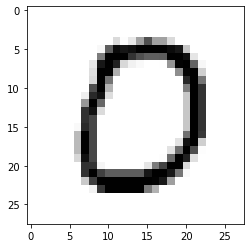

In [26]:
Index = 10
plt.imshow(test_images[Index].reshape(28,28),cmap='Greys')
result = network.predict(test_images[Index].reshape(1,784))
print(result.argmax())
